In [ ]:
import sklearn.linear_model as linear_model
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
b_1=2
b_0=10
x=np.arange(10)
y=b_1*x+b_0 +np.random.randn(10)
x.shape

(10,)

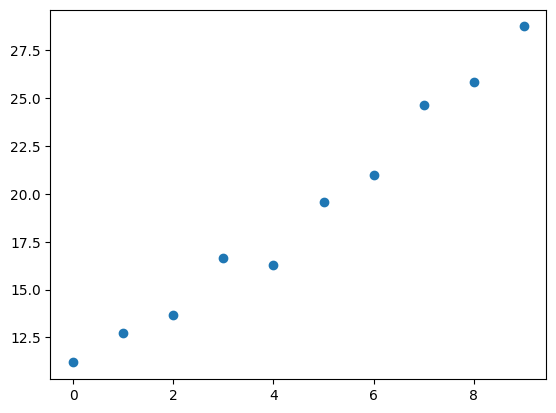

In [ ]:
plt.scatter(x,y)

In [ ]:
my_model=linear_model.LinearRegression()

In [ ]:
x_reshaped=x.reshape(-1,1)
x_reshaped.shape

(10, 1)

In [ ]:
my_model.fit(x_reshaped,y)

LinearRegression()

In [ ]:
my_model.coef_

array([1.94520879])

In [ ]:
my_model.intercept_

np.float64(10.285357501398599)

In [ ]:
y_pred=my_model.predict(x_reshaped)
y_pred

array([10.2853575 , 12.23056629, 14.17577508, 16.12098387, 18.06619266,
       20.01140145, 21.95661024, 23.90181903, 25.84702782, 27.7922366 ])

In [ ]:
y

array([11.19105298, 12.75673594, 13.6582207 , 16.64295667, 16.29808572,
       19.59994894, 20.99031184, 24.66008715, 25.84615884, 28.74441175])

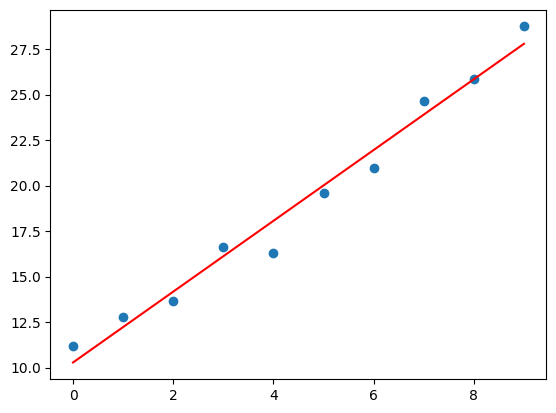

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')

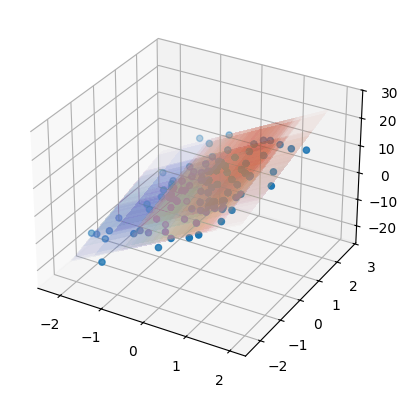

In [ ]:
beta_0=2
beta=np.array([8,3])

X=np.random.randn(100,2)

Y=X.dot(beta)+beta_0 +np.random.randn(100)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1], Y)
X_0, X_1 = np.meshgrid(X[:,0],X[:,1])
ax.plot_surface(X_0,X_1, X_0*beta[0]+X_1*beta[1]+beta_0, cmap=cm.coolwarm,alpha=0.01)

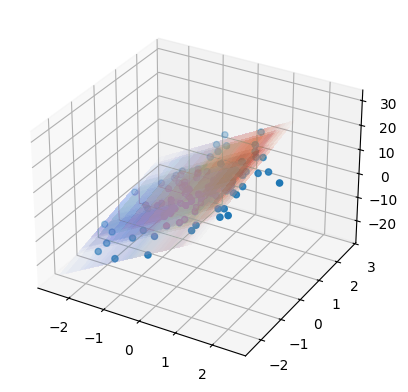

In [ ]:
from matplotlib import cm
beta_0=2
beta=np.array([8,3])

X=np.random.randn(100,2)

Y=X.dot(beta)+beta_0 +np.random.randn(100)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1], Y)
X_0, X_1 = np.meshgrid(X[:,0],X[:,1])
ax.plot_surface(X_0,X_1, X_0*beta[0]+X_1*beta[1]+beta_0, cmap=cm.coolwarm,alpha=0.01)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

class LinearRegression:
    def __init__(self):
        self.b = None
        self.b_0 = None

    def fit(self, x_train, y_train):
        ones = np.ones((x_train.shape[0], 1))
        X = np.hstack([ones, x_train])

        beta = np.linalg.inv(X.T @ X) @ X.T @ y_train

        self.b_0 = beta[0]
        self.b = beta[1:]

    def predict(self, x_val):
        return self.b_0 + x_val @ self.b

    def get_coeffs(self):
        return self.b_0, self.b

    def get_score(self, x_test, y_test):
        mse = np.mean((y_test - self.predict(x_test))**2)
        return mse



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

class LinearRegressionGD(LinearRegression):
    def fit(self, x_train, y_train):
        ones = np.ones((x_train.shape[0], 1))
        X = np.hstack([ones, x_train])
        beta = np.zeros(X.shape[1])
        learning_rate = 0.001
        iter = 10000

        for _ in range(iter):
            y_pred = X @ beta
            grad = X.T @ (y_pred - y_train)
            beta = beta - learning_rate * grad

        self.b_0 = beta[0]
        self.b = beta[1:]


In [ ]:
l = LinearRegression()
l.fit(X,Y)
print(l.get_coeffs())

(np.float64(1.9656626957887418), array([8.02362327, 3.00242546]))


In [ ]:

lgd = LinearRegressionGD()
l.fit(X,Y)
print(l.get_coeffs())

(np.float64(1.965662695788743), array([8.02362327, 3.00242546]))


* Do the same for Ridge Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

class RidgeRegression(LinearRegression):
    def __init__(self, alfa = 1):
        super().__init__()
        self.alfa = alfa

    def fit(self, x_train, y_train):
        ones = np.ones((x_train.shape[0], 1))
        X = np.hstack([ones, x_train])
        beta = np.linalg.inv(X.T @ X + self.alfa * np.eye(X.shape[1])) @ X.T @ y_train

        self.b_0 = beta[0]
        self.b = beta[1:]


In [ ]:

rr = RidgeRegression()
rr.fit(X,Y)
print(l.get_coeffs())

(np.float64(1.935346996827602), array([7.81938257, 3.0396996 ]))


In [ ]:
lr_1=LinearRegression()
lr_1.fit(x_reshaped,y)
print(lr_1.get_coeffs())

lrgd_1=LinearRegressionGD()
lrgd_1.fit(x_reshaped,y)

rr_1=RidgeRegression()
rr_1.fit(x_reshaped,y)
print(rr_1.get_coeffs())

rr_10=RidgeRegression(alfa=10)
rr_10.fit(x_reshaped,y)
print(rr_10.get_coeffs())

rr_01=RidgeRegression(alfa=0.1)
rr_01.fit(x_reshaped,y)

(np.float64(10.2853575013986), array([1.94520879]))
(np.float64(7.739346930583906), array([2.33900343]))
(np.float64(2.6811095855383247), array([3.03923953]))


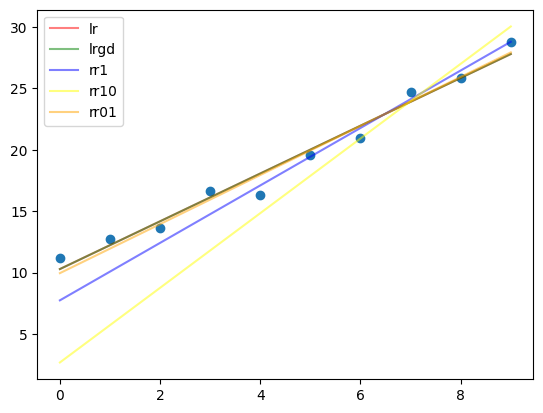

In [ ]:
y_pred_1=lr_1.predict(x_reshaped)
y_pred_gd_1=lrgd_1.predict(x_reshaped)
y_pred_rr_1=rr_1.predict(x_reshaped)
y_pred_rr_10=rr_10.predict(x_reshaped)
y_pred_rr_01=rr_01.predict(x_reshaped)
a=0.5
plt.scatter(x,y)
plt.plot(x,y_pred_1,color='red',label='lr',alpha=a)
plt.plot(x,y_pred_gd_1,color='green',label="lrgd",alpha=a)
plt.plot(x,y_pred_rr_1,color='blue',label='rr1',alpha=a)
plt.plot(x,y_pred_rr_10,color='yellow',label='rr10',alpha=a)
plt.plot(x,y_pred_rr_01,color='orange',label='rr01',alpha=a)
plt.legend()


(np.float64(1.7140712832597569), array([6.3109705 , 2.25897426]))


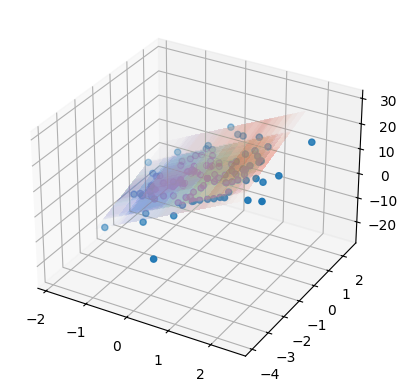

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

class RidgeRegression:
    def __init__(self):
        self.b = None
        self.b_0 = None
        self.alfa = 10
    def fit(self, x_train, y_train):
        ones = np.ones((x_train.shape[0], 1))
        X = np.hstack([ones, x_train])
        beta = np.linalg.inv(X.T @ X + self.alfa * np.eye(X.shape[1])) @ X.T @ y_train

        self.b_0 = beta[0]
        self.b = beta[1:]

    def predict(self, x_val):
        return self.b_0 + x_val @ self.b

    def get_coeffs(self):
        return self.b_0, self.b

    def get_score(self, x_test, y_test):
        mse = np.mean((y_test - self.predict(x_test))**2)
        return mse


class RidgeRegressionGD(RidgeRegression):
    def __init__(self):
        super().__init__()
    def fit(self, x_train, y_train):
        ones = np.ones((x_train.shape[0], 1))
        X = np.hstack([ones, x_train])
        beta = np.zeros(X.shape[1])
        learning_rate = 0.001
        iter = 10000

        for _ in range(iter):
            y_pred = X @ beta
            grad = X.T @ (y_pred - y_train) + 2 * self.alfa * beta
            beta = beta - learning_rate * grad

        self.b_0 = beta[0]
        self.b = beta[1:]


beta_0=2
beta=np.array([8,3])

X=np.random.randn(100,2)

Y=X.dot(beta)+beta_0 +np.random.randn(100)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1], Y)
X_0, X_1 = np.meshgrid(X[:,0],X[:,1])
ax.plot_surface(X_0,X_1, X_0*beta[0]+X_1*beta[1]+beta_0, cmap=cm.coolwarm,alpha=0.01)

l = RidgeRegressionGD()
l.fit(X,Y)
print(l.get_coeffs())